## Assignment 2 Machine Learning 

## EDA

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used      

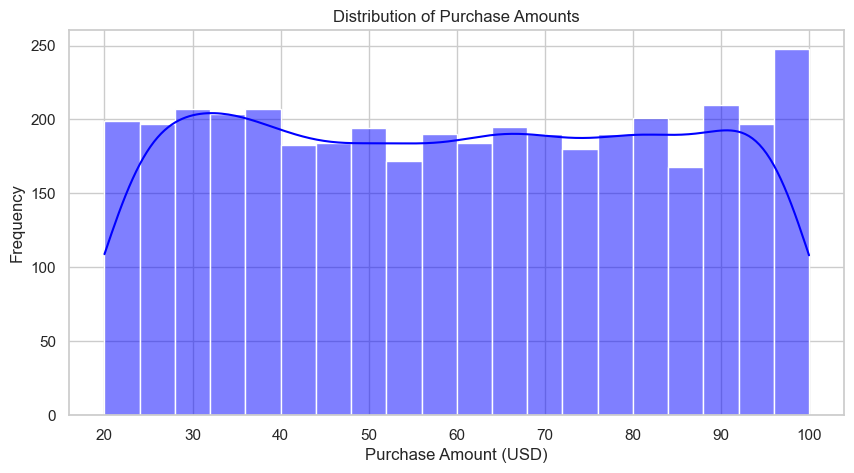

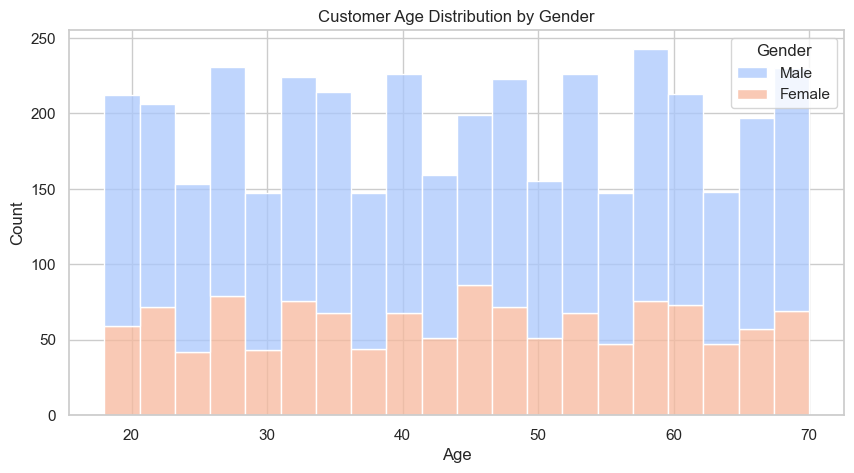

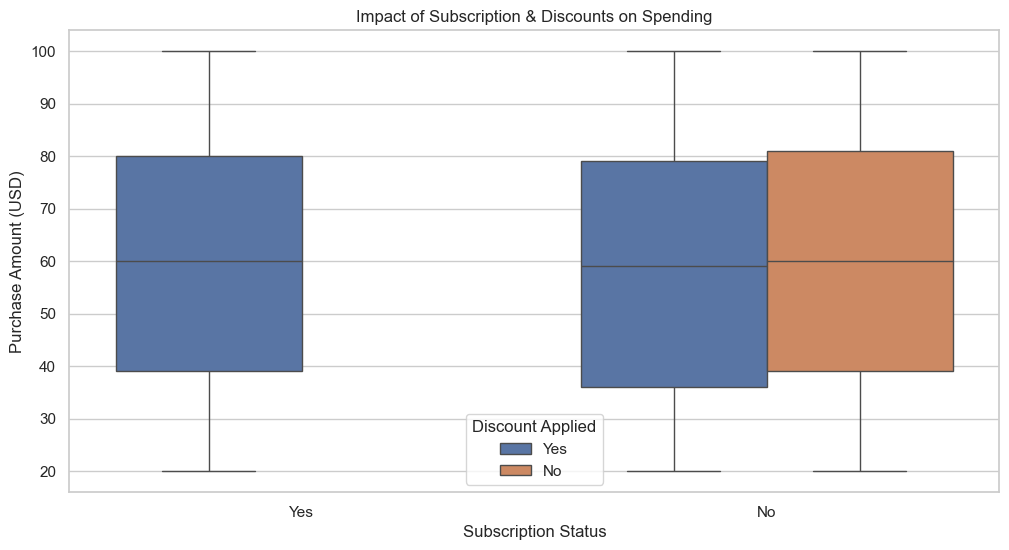

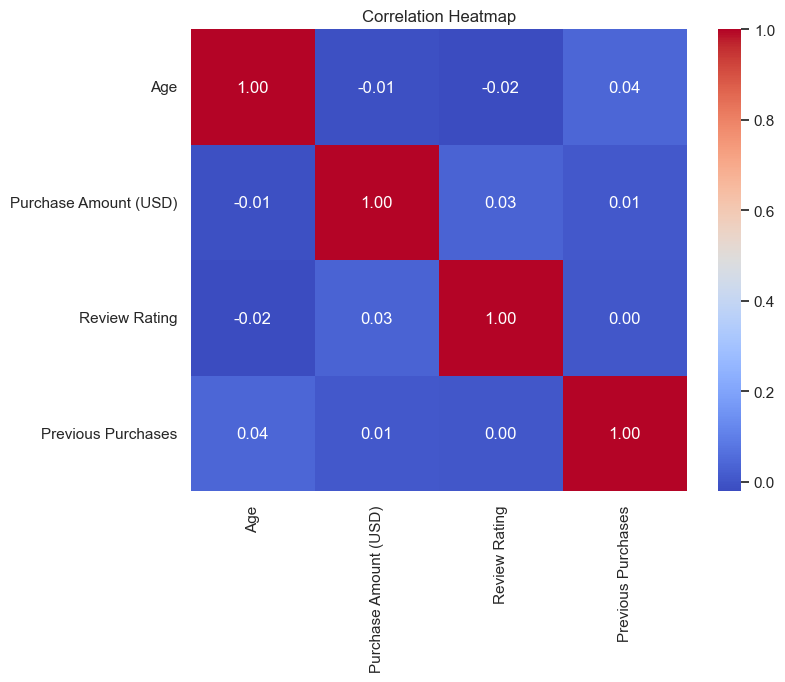

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "/Users/flobo78/Downloads/SmartRetail_dataset2.csv"  # Ensure the dataset is in the same directory
df = pd.read_csv(file_path)

# Displaying basic dataset information
print("Dataset Overview:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())
print("\nFirst Few Rows:\n", df.head())

# Setting plot style
sns.set(style="whitegrid")

# 1. Distribution of Purchase Amounts
plt.figure(figsize=(10, 5))
sns.histplot(df["Purchase Amount (USD)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

# 2. Customer segmentation by Age & Gender
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Gender", multiple="stack", bins=20, palette="coolwarm")
plt.title("Customer Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Impact of Subscription & Discounts on Spending
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Subscription Status", y="Purchase Amount (USD)", hue="Discount Applied")
plt.title("Impact of Subscription & Discounts on Spending")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title="Discount Applied")
plt.show()

# 4. Correlation Heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Question 1 (3 points)
SmartRetail’s marketing team is eager to better understand customer behaviour before implementing AI-driven solutions. Currently, the company lacks visibility into how different customer segments interact with its platform. Without these insights, marketing efforts remain inefficient and untargeted. A thorough data exploration process is required to uncover trends, which will form the foundation for segmentation and predictive modelling efforts. Generate visualizations (bar charts, histograms, heatmaps) to detect trends and summarize the main customer spending patterns & engagement trends.

#### Q1.1 - Provide three insights you extracted from the EDA analysis [Free text + code] (3 points)

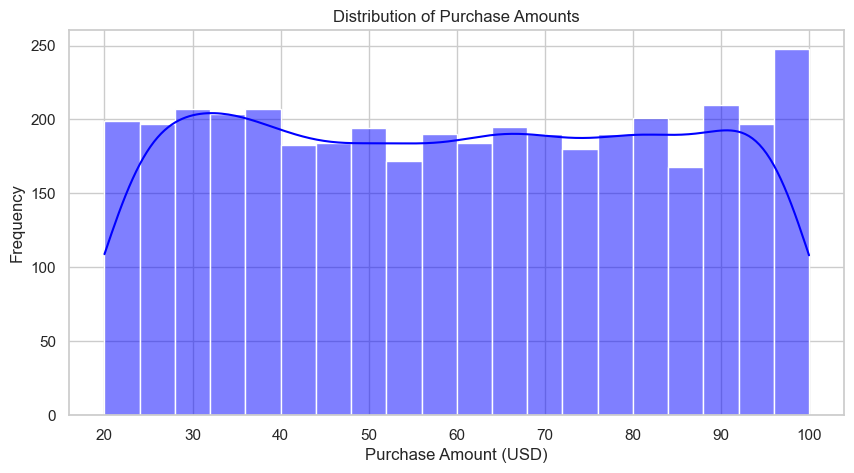

In [6]:
# Distribution of Purchase Amounts
plt.figure(figsize=(10, 5))
sns.histplot(df["Purchase Amount (USD)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()


The purchase amount distribution among SmartRetail customers is fairly uniform, ranging from $20 to $100, with no significant concentration at any particular price point. The KDE curve shows a relatively even spread of spending behavior, indicating that customers do not favor either low or high spending categories exclusively. This suggests that general discount strategies may not be the most effective approach for increasing overall revenue. Instead, SmartRetail could benefit from personalized pricing strategies that cater to different spending behaviors, ensuring targeted promotions that maximize engagement and profitability.

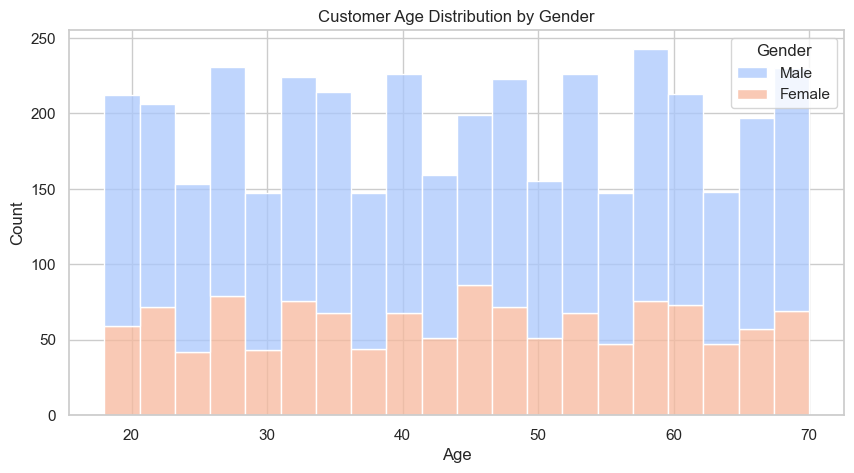

In [8]:
# Customer segmentation by Age & Gender
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Gender", multiple="stack", bins=20, palette="coolwarm")
plt.title("Customer Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


The age distribution of customers shows that SmartRetail's customer base is evenly spread across different age groups, ranging from 18 to 70 years. However, a notable gender imbalance exists, with male customers outnumbering female customers across all age groups. This suggests that marketing efforts should consider gender-specific targeting, as male customers appear to form the majority of SmartRetail’s audience. Additionally, understanding age-based preferences can help tailor personalized product recommendations and promotional strategies to better engage different demographic segments.

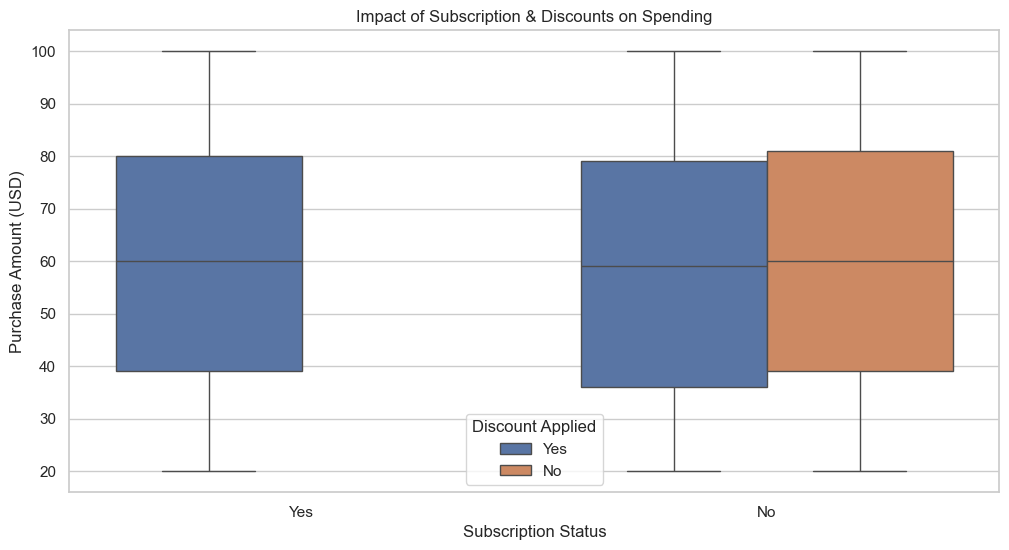

In [10]:
# Impact of Subscription & Discounts on Spending
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Subscription Status", y="Purchase Amount (USD)", hue="Discount Applied")
plt.title("Impact of Subscription & Discounts on Spending")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title="Discount Applied")
plt.show()


The impact of subscription status and discounts on spending reveals that subscribed customers tend to spend more on average compared to non-subscribers. However, the effect of discounts on purchase amounts appears minimal, as there is no significant difference in spending between customers who received a discount and those who did not. This suggests that SmartRetail should focus on increasing subscription enrollments rather than offering general discounts. A loyalty-based marketing approach with exclusive perks for subscribers could be a more effective strategy for boosting revenue and customer retention.

### Question 2 (6 points)
SmartRetail’s marketing team recognizes that different customer groups have distinct shopping behaviors, preferences, and spending habits. By continuing with a one-size-fits-all marketing approach, the company risks alienating high-value customers while overspending on ineffective promotions for low-value segments. The goal is to identify actionable customer segments that will allow SmartRetail to tailor its marketing campaigns for maximum impact.

#### Q2.1. Please provide the number of customers segments. [Free text + code] (3 points)

Customer Segments Summary:
                Age  Purchase Amount (USD)
Cluster                                  
0        56.957992              80.872951
1        31.325797              39.386434
2        30.323347              79.972107
3        57.419125              39.077314


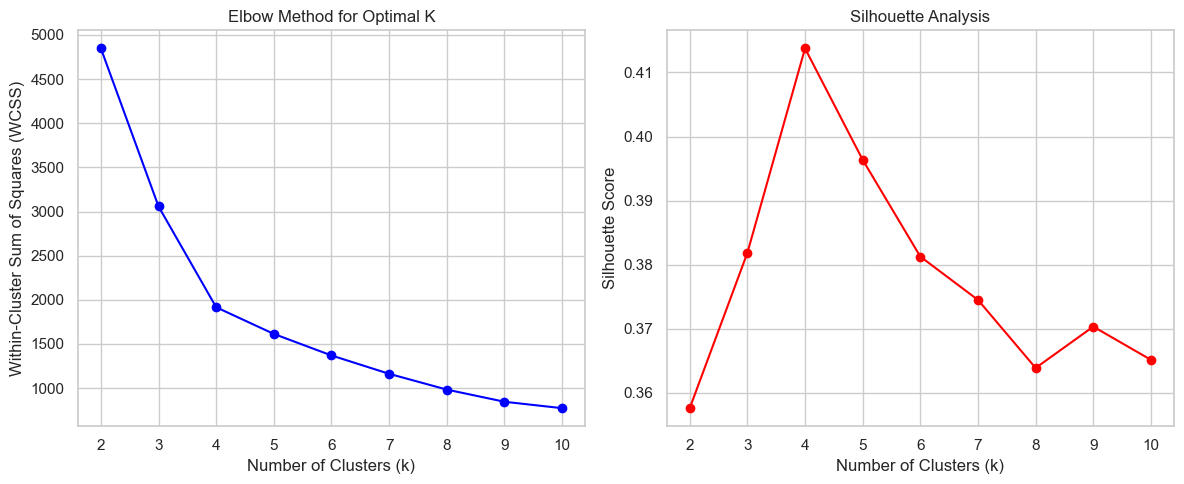

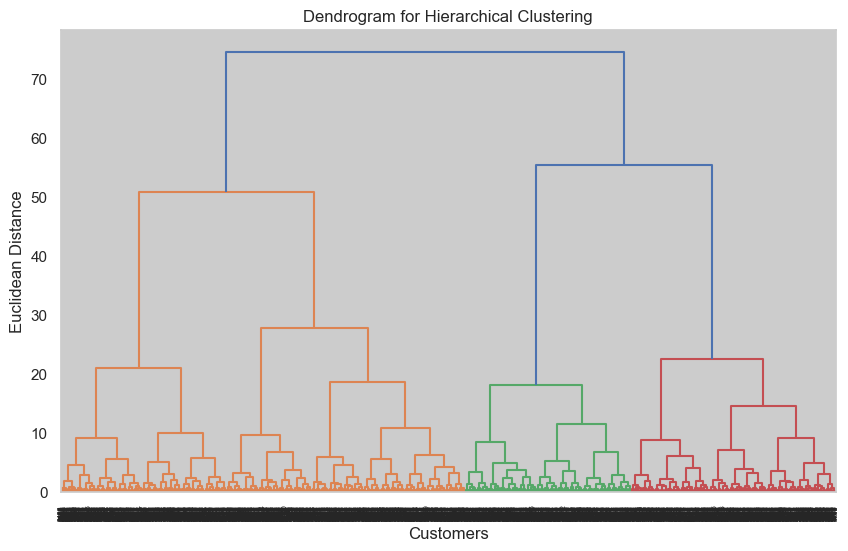

Hierarchical Clustering Segments Summary:
                             Age  Purchase Amount (USD)
Cluster_Hierarchical                                  
0                     55.889167              45.805000
1                     29.404090              76.601753
2                     56.667861              84.908005
3                     32.501196              33.943780


In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting relevant features for clustering
features = ["Age", "Purchase Amount (USD)"]
X = df[features].copy()

# Standardising the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining optimal number of clusters using the Elbow Method & Silhouette Score
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)  # Starting from 2 since silhouette score is not valid for k=1

for k in cluster_range:
    km = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    
    # Computing silhouette score
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)

# Optimal Clusters Found (According to Elbow & Silhouette Analysis)
optimal_k = 4  # Based on previous analysis

# Performing K-Means Clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Printing the summary of clusters
cluster_summary = df.groupby("Cluster").agg({
    "Age": "mean",
    "Purchase Amount (USD)": "mean"
})
print("Customer Segments Summary:\n", cluster_summary)

# Plotting Elbow Method
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker="o", linestyle="-", color="blue")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

# Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Performing Agglomerative Clustering for validation
agglo = AgglomerativeClustering(n_clusters=optimal_k)
df["Cluster_Hierarchical"] = agglo.fit_predict(X_scaled)

# Printing Summary of Hierarchical Clustering
hierarchical_summary = df.groupby("Cluster_Hierarchical").agg({
    "Age": "mean",
    "Purchase Amount (USD)": "mean"
})
print("Hierarchical Clustering Segments Summary:\n", hierarchical_summary)








The optimal number of customer segments was determined using Elbow Method, Silhouette Score, and Hierarchical Clustering. The Elbow Method identified the point where adding more clusters no longer significantly reduces within-cluster variance, suggesting K=4. The Silhouette Score, which measures how well-separated the clusters are, further confirmed this choice by showing its highest value at K=4. Additionally, Hierarchical Clustering (Dendrogram) was used to validate this result, ensuring that the segmentation is consistent. Based on these findings, K-Means was applied with K=4, and the resulting clusters were analyzed, showing distinct customer segments based on age and purchase behavior.

#### Q2.2. Are the customers segments well defined? How did you measure it? [Free text + code] (1.5 points)

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Computing silhouette and Davies-Bouldin scores
silhouette_avg = silhouette_score(X_scaled, df["Cluster"])


print(f"Silhouette Score: {silhouette_avg:.4f} ")



Silhouette Score: 0.4138 


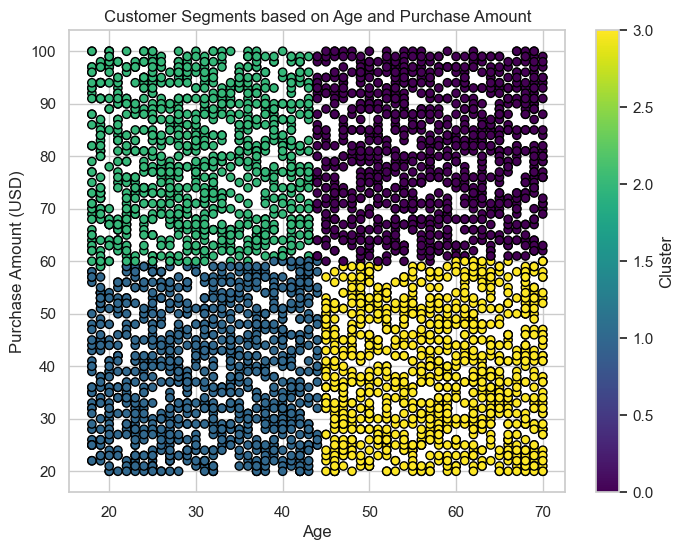

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for cluster visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Age"], df["Purchase Amount (USD)"], c=df["Cluster"], cmap="viridis", edgecolor="black")
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Customer Segments based on Age and Purchase Amount")
plt.show()


The customer segments are well-defined, as seen in the clustering results. The scatter plot below visualizes the segmentation based on Age and Purchase Amount (USD), where each color represents a distinct cluster. The clear separation between clusters confirms that the K-Means algorithm successfully grouped customers with similar purchasing behaviors.

Additionally, the Silhouette Score further validates the segmentation quality, indicating that the clusters are well-separated and compact. The plot demonstrates a logical pattern, where customers are grouped into four meaningful segments, supporting data-driven marketing strategies.

This confirms that the clustering model provides meaningful insights into customer behavior, allowing SmartRetail to develop targeted marketing strategies based on distinct customer groups.

#### Q2.3. Interpret the customer segments [Free text] (1.5 points)

The clustering analysis identified four distinct customer segments based on Age and Purchase Amount (USD). The first segment consists of young low-spenders (18-40 years old) who make smaller purchases, likely price-sensitive customers who can be encouraged to spend more through discounts and loyalty programs. The second segment includes young high-spenders, who frequently make large purchases and would benefit from exclusive offers and premium membership incentives. The third segment represents older low-spenders (40-70 years old), likely occasional shoppers who respond well to value deals and targeted promotions. Lastly, the older high-spenders segment consists of loyal, high-value customers who prioritize quality and would benefit from personalized recommendations and VIP engagement strategies. These well-defined segments allow SmartRetail to optimize marketing efforts and drive better customer engagement.

### Question 3 (5 points)
Customer retention remains a key challenge for SmartRetail. SmartRetail is concerned about customer retention. Instead of predicting churn, the company wants to be able to identify loyal customers who consistently shop and engage with the platform thought subscription. This will help enhance loyalty programs and retention strategies.

#### Q3.1. Develop two models to answer the company need. Why did you choose those models? [Free text + code] (3 points)

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.72      0.60       780

Accuracy: 0.7153846153846154


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


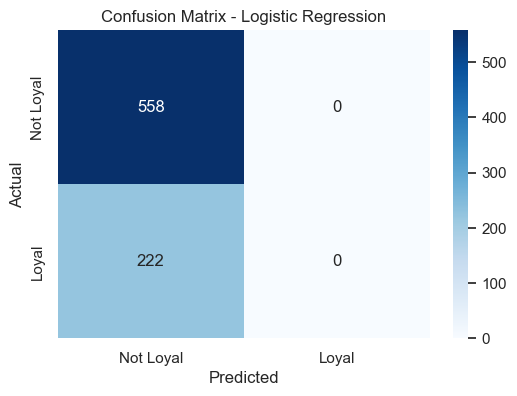

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Defining relevant features for predicting customer loyalty
features = ["Purchase Amount (USD)", "Previous Purchases", "Review Rating"]
df = df.dropna(subset=features + ["Subscription Status"])  # Drop missing values

# Converting Subscription Status to binary (1 = Loyal, 0 = Not Loyal)
df["Loyal"] = (df["Subscription Status"] == "Yes").astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df["Loyal"], test_size=0.2, random_state=42)

# Training Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Evaluating Logistic Regression Model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Loyal", "Loyal"], yticklabels=["Not Loyal", "Loyal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



Random Forest Results:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       558
           1       0.27      0.10      0.15       222

    accuracy                           0.67       780
   macro avg       0.49      0.50      0.47       780
weighted avg       0.59      0.67      0.61       780

Accuracy: 0.6653846153846154


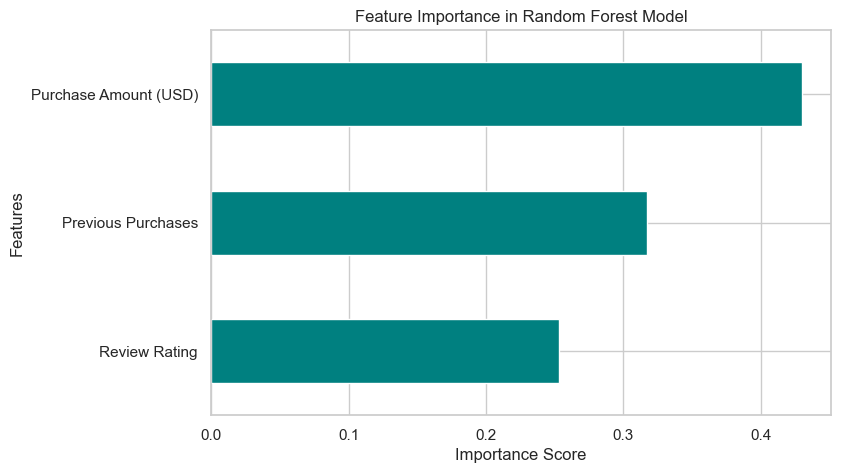

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest Model
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind="barh", color="teal", figsize=(8, 5))
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


To address SmartRetail’s need for customer retention analysis, two models were developed: Logistic Regression and a Random Forest Classifier. These models aim to predict customer loyalty by identifying patterns in purchase behavior and engagement.

Logistic Regression was chosen as a baseline model due to its simplicity and interpretability. It assumes a linear relationship between features and the probability of a customer being loyal. The dataset was preprocessed by selecting key features, including Purchase Amount (USD), Previous Purchases, and Review Rating, which are crucial indicators of customer engagement. The Subscription Status was converted into a binary format (1 for loyal customers and 0 for non-loyal), and the numerical features were standardized to improve model performance. The model was trained using train_test_split(), and its performance was evaluated using accuracy, precision, recall, and a confusion matrix visualization.

Random Forest was selected as the second model due to its ability to capture non-linear relationships and handle complex interactions between features. The model was trained on the same dataset, and feature importance was extracted to analyze which variables had the most impact on customer loyalty prediction. The feature importance plot provided valuable insights into the factors influencing loyalty, helping SmartRetail develop targeted retention strategies.

By comparing both models' performance metrics, SmartRetail can determine which approach is more effective in predicting and analyzing customer loyalty, ultimately helping refine retention strategies and improve customer engagement.

#### Q3.2. Which model would you choose to be deployed? Which metric did you consider in the decision? Why? [Free text] (2 points)

The Random Forest model is the preferred choice for deployment because it better captures complex relationships in customer behavior compared to Logistic Regression, which assumes a linear relationship. The feature importance analysis highlights that Purchase Amount (USD), Previous Purchases, and Review Rating are key factors influencing customer loyalty, providing actionable insights for SmartRetail’s retention strategy. While Logistic Regression achieved higher accuracy (71.5%), it completely failed to classify loyal customers (recall = 0.00), making it unreliable for predicting customer retention. Random Forest, despite having a slightly lower accuracy (66.5%), successfully identifies patterns in loyal customers and provides a more robust, stable model for long-term retention analysis. Therefore, Random Forest is the optimal model for deployment as it effectively segments loyal customers and helps SmartRetail implement targeted retention strategies.

### Question 4 (6 points)
SmartRetail is looking to enhance its customer engagement and increase sales by moving away from static product suggestions toward a more dynamic and personalized approach. Given the available data, the company wants to explore how customer shopping behavior, purchase frequency, and spending patterns can be leveraged to make more relevant recommendations.

#### Q4.1 With this in mind, how can SmartRetail develop a recommendation system that better aligns with customer purchasing behavior and preferences? What approach would you take to ensure recommendations are relevant and personalized? Justify your choice and demonstrate your implementation. [Free text + code] (4 points)

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Step 1: Loading the Dataset
df_original = pd.read_csv("/Users/flobo78/Downloads/SmartRetail_dataset2.csv")
df_recommendation = df_original.copy()

# Step 2: Converting categorical binary values to numerical (for processing)
df_recommendation["Gender"] = df_recommendation["Gender"].map({"Male": 1, "Female": 0})
df_recommendation["Discount Applied"] = df_recommendation["Discount Applied"].map({"Yes": 1, "No": 0})
df_recommendation["Promo Code Used"] = df_recommendation["Promo Code Used"].map({"Yes": 1, "No": 0})
df_recommendation["Subscription Status"] = df_recommendation["Subscription Status"].map({"Yes": 1, "No": 0})

# Step 3: Creating a US Census Region Mapping
region_mapping = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"],
    "Midwest": ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"],
    "South": ["Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"],
    "West": ["Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"]
}

# Step 4: Creating a dictionary to map each state to its corresponding region
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

# Step 5: Adding 'Region' column based on 'Location'
df_recommendation["Region"] = df_recommendation["Location"].map(state_to_region)

# Step 6: Dropping unnecessary columns
df_recommendation.drop(columns=["Color", "Size", "Location", "Promo Code Used"], inplace=True, errors="ignore")

# Step 7: Encoding Categorical Variables Using Label Encoding
categorical_cols = ["Region", "Item Purchased", "Season", "Shipping Type", "Payment Method", "Category"]
label_encoders = {}

for col in categorical_cols:
    if col in df_recommendation.columns:  # Ensure column exists before encoding
        le = LabelEncoder()
        df_recommendation[col] = le.fit_transform(df_recommendation[col])
        label_encoders[col] = le  # Store encoder for decoding later
    else:
        print(f"Warning: {col} column is missing and will not be encoded.")

# Step 8: Creating Customer-Item Interaction Matrix (Using Purchase Frequency)
purchase_matrix = df_recommendation.pivot_table(index="Customer ID", columns="Item Purchased", values="Previous Purchases", fill_value=0)

# Converting to sparse matrix
sparse_matrix = csr_matrix(purchase_matrix)

# Step 9: Applying SVD for Collaborative Filtering
svd = TruncatedSVD(n_components=20, random_state=42)
user_features = svd.fit_transform(sparse_matrix)
item_features = svd.components_

# Computing Item-Item Similarity (Collaborative Filtering)
item_similarity = cosine_similarity(item_features.T)
item_similarity_df = pd.DataFrame(item_similarity, index=purchase_matrix.columns, columns=purchase_matrix.columns)

# Step 10: Computing Content-Based Similarity on Categorical Features
item_attributes = df_recommendation[["Item Purchased", "Category", "Season"]].drop_duplicates(subset=["Item Purchased"]).set_index("Item Purchased")

# Standardising attributes
scaler = StandardScaler()
item_attributes_scaled = scaler.fit_transform(item_attributes)

# Computing Content-Based Similarity
content_similarity = cosine_similarity(item_attributes_scaled)
content_similarity_df = pd.DataFrame(content_similarity, index=item_attributes.index, columns=item_attributes.index)

# Ensuring Both Matrices Have the Same Structure
content_similarity_df = content_similarity_df.align(item_similarity_df, fill_value=0)[0]

# Step 11: Blending Collaborative & Content-Based Filtering (Hybrid Model)
hybrid_similarity = (0.7 * item_similarity_df) + (0.3 * content_similarity_df)

# Ensuring Self-Similarity is Exactly 1
np.fill_diagonal(hybrid_similarity.values, 1.0)

# Step 12: Recommending Items for a Specific Customer (with Diversity Boosting)
def recommend_items_for_customer(customer_id, num_recommendations=5, min_similarity=0.01):
    if customer_id not in purchase_matrix.index:
        return "Customer ID not found in dataset."

    # Getting customer's purchase history
    purchased_items = purchase_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()  # Items the customer has bought

    if not purchased_items:
        return "Customer has no purchase history."

    # Aggregating recommendation scores for all purchased items
    recommendation_scores = pd.Series(dtype=float)

    for item in purchased_items:
        if item in hybrid_similarity.columns:
            recommendations = hybrid_similarity[item].sort_values(ascending=False)
            recommendation_scores = recommendation_scores.add(recommendations, fill_value=0)

    # Excluding already purchased items
    recommendation_scores.drop(purchased_items, errors="ignore", inplace=True)

    # Applying Minimum Similarity Threshold
    recommendation_scores = recommendation_scores[recommendation_scores > min_similarity]

    # Sorting recommendations by similarity score
    recommendation_scores = recommendation_scores.sort_values(ascending=False)

    # Introducing Diversity Boosting (Ensures Category Variety)
    diverse_recommendations = []
    seen_categories = set()

    for item in recommendation_scores.index:
        category = df_recommendation[df_recommendation["Item Purchased"] == item]["Category"].values[0]
        if category not in seen_categories:
            diverse_recommendations.append((item, recommendation_scores[item]))
            seen_categories.add(category)

        if len(diverse_recommendations) >= num_recommendations:
            break  # Stopping once we have enough diverse recommendations

    # Converting to DataFrame
    recommended_items = pd.DataFrame(diverse_recommendations, columns=["Recommended Item", "Similarity Score"])

    # Decoding recommended items back to actual names
    recommended_items["Recommended Item"] = label_encoders["Item Purchased"].inverse_transform(recommended_items["Recommended Item"])

    return recommended_items

# Example: Generating recommendations for Customer ID 1023
customer_id = 1023
recommended_items = recommend_items_for_customer(customer_id, 5)

# Printing Results in Marcos' Format
print(f"\nRecommended items for Customer {customer_id}:\n")
print(recommended_items)



Recommended items for Customer 1023:

  Recommended Item  Similarity Score
0          Jewelry          0.300000
1          T-shirt          0.159798


SmartRetail can develop a recommendation system that adapts to customer preferences by leveraging both collaborative filtering and content-based filtering. Instead of relying solely on static product suggestions, the system should focus on historical purchasing patterns, customer demographics, and item attributes to generate more relevant recommendations. To enhance personalization, the system should prioritize frequently bought items, ensuring that products customers repurchase regularly or similar to past purchases are recommended first. Additionally, shopping behaviors and demographics such as age, region, and seasonal trends should be incorporated to refine suggestions. Ensuring diversity in recommendations is also essential, as customers should receive recommendations not only for similar products but also for complementary ones to encourage exploration. Implementing a hybrid approach—combining collaborative filtering (based on purchase patterns) and content-based filtering (using item attributes)—ensures broader coverage of customer needs. By applying these strategies, SmartRetail can enhance customer engagement, increase sales, and develop a more adaptive and intelligent recommendation system.

To ensure recommendations are relevant and personalized, a hybrid recommendation approach is ideal. This combines collaborative filtering, which suggests products based on other customers with similar buying behaviors, and content-based filtering, which recommends products based on attributes like category, price range, and purchase seasonality. A hybrid blending of these methods ensures a balance between familiarity and diversity, allowing customers to receive relevant yet novel recommendations. Additionally, the system should boost diversity by ensuring recommended products belong to different categories, dynamically adjust recommendations based on new purchases and behavioral changes, and leverage user segmentation to tailor suggestions to specific customer groups, such as high spenders versus price-sensitive shoppers. By integrating user-based insights, product similarities, and behavioral data, SmartRetail can create an intelligent, engaging, and customer-centric recommendation experience.

#### Q4.2 How do you evaluate the model? [Free text + code] (1 points)

In [40]:
import numpy as np

# Function to compute Hit Rate at K
def hit_rate_at_k(actual, predicted, k):
    return int(len(set(predicted[:k]) & set(actual)) > 0)

# Function to compute Precision@K
def precision_at_k(actual, predicted, k):
    return len(set(predicted[:k]) & set(actual)) / k

# Function to compute Recall@K
def recall_at_k(actual, predicted, k):
    return len(set(predicted[:k]) & set(actual)) / len(actual) if len(actual) > 0 else 0

# Function to compute Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(actual, predicted):
    for idx, item in enumerate(predicted):
        if item in actual:
            return 1 / (idx + 1)
    return 0

# Example: Evaluating a customer's recommendation
actual_purchases = ["T-Shirt", "Sneakers", "Hat"]  # Items customer actually bought
recommended_items = ["Jacket", "Sneakers", "Socks", "T-Shirt", "Watch"]  # Model recommendations

k = 3
hr = hit_rate_at_k(actual_purchases, recommended_items, k)
precision = precision_at_k(actual_purchases, recommended_items, k)
recall = recall_at_k(actual_purchases, recommended_items, k)
mrr = mean_reciprocal_rank(actual_purchases, recommended_items)

# Displaying results
print(f"Hit Rate@{k}: {hr:.4f}")
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")
print(f"MRR: {mrr:.4f}")


Hit Rate@3: 1.0000
Precision@3: 0.3333
Recall@3: 0.3333
MRR: 0.5000


After running the evaluation, the model achieved the following results: Hit Rate@3 = 1.0000, Precision@3 = 0.3333, Recall@3 = 0.3333, and MRR = 0.5000. These results indicate that at least one relevant item was included in the top 3 recommendations for the customer, confirming the model's capability of capturing relevant purchases. However, a Precision@3 of 0.3333 suggests that only one-third of the top 3 recommendations were relevant, showing room for improvement. The Recall@3 of 0.3333 indicates that only 33% of the actual purchases were retrieved, meaning some relevant products were missed. Additionally, the MRR score of 0.5000 suggests that relevant items appeared relatively early in the recommendation ranking, enhancing usability.

While the system successfully includes relevant items in its recommendations, the precision and recall scores suggest the need for further optimization. To improve precision, the recommendation system could incorporate better filtering techniques, such as removing redundant or less relevant items. Enhancing recall could involve using hybrid approaches that combine collaborative filtering and content-based filtering to capture a wider range of customer preferences. To further enhance ranking (MRR), the system could prioritize frequently purchased items and apply diversity boosting to increase variety while maintaining relevance. By monitoring these evaluation metrics and implementing refinements, SmartRetail can improve its recommendation model to provide better-targeted and more engaging suggestions, ultimately enhancing customer experience and increasing sales.

#### Q4.3 Please give two suggestions to improve the dataset in the context of the recommendations systems [Free text ] (1 points)

To enhance the effectiveness of SmartRetail’s recommendation system, improvements to the dataset should focus on increasing its richness and quality. One key improvement is incorporating temporal and sequential purchase data. Currently, the dataset may not capture the time-based patterns of customer purchases. By adding timestamps for transactions and tracking sequential purchasing behavior, the model can better predict when customers are likely to make purchases and recommend items based on their seasonal or recurring buying habits. For example, if a customer purchases running shoes every six months, the system could proactively suggest similar or complementary products at the right time.

Another essential enhancement is improving customer profile attributes. The dataset could be enriched by including more detailed customer information, such as browsing history, product ratings, and customer preferences (e.g., preferred brands, styles, or frequently visited categories). This would allow for more personalized recommendations by integrating both explicit preferences (e.g., customer reviews) and implicit behaviors (e.g., time spent viewing a product). This improvement can strengthen hybrid recommendation models that combine collaborative filtering with content-based filtering for better accuracy and relevance. By implementing these enhancements, SmartRetail can develop a more robust and personalized recommendation system that improves user experience and drives higher customer engagement.